In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')
from utils import *
import pickle
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

Load file containing candidate -> corpus mapping :

In [2]:
f = open("../communities/v1/candidate_to_tweets", "rb")
candidate_to_tweets = pickle.load(f)
f.close()

In [3]:
candidates_mapping = {
    0 : "Arthaud",
    1 : "Asselineau",
    2 : "Cheminade",
    3 : "Dupont-Aignan",
    4 : "Fillon",
    5 : "Hamon",
    6 : "Lassalle",
    7 : "Le Pen",
    8 : "Macron",
    9 : "Mélenchon",
    10 : "Poutou"
}

In [4]:
for cand in candidate_to_tweets.keys():
    print("{} ({}) - nombre de tweets : {}".format(candidates_mapping[cand], cand, \
                                              len(candidate_to_tweets[cand][0])))

Macron (8) - nombre de tweets : 4475
Mélenchon (9) - nombre de tweets : 5198
Fillon (4) - nombre de tweets : 2979
Hamon (5) - nombre de tweets : 2634
Le Pen (7) - nombre de tweets : 3060


In [9]:
def split_binary(cand, dict_data):
    corpus = []
    labels = []
    for c, data in dict_data.items():
        tweets = data[0]
        if c != cand:
            y = - np.ones(len(tweets)) # tweets des autres communautés -> -1
        else:
            ind = np.argwhere(data[1] == 1).flatten()
            # tweets négatifs (concernent donc les autres candidats) de la communauté en question -> -1 
            y = - np.ones(len(tweets)) 
            # tweets positifs (concernent donc le candidat en question) -> +1
            y[ind] = np.ones(len(ind)) # 
        corpus = np.append(corpus, tweets)
        labels = np.append(labels, y)
    return corpus, labels

## Mélenchon against all

Tous les tweets positifs de la communauté Mélenchon sont affectés au label +1, le reste au label -1.

In [10]:
corpus1, labels1 = split_binary(9, candidate_to_tweets)

In [16]:
len(corpus1)

18346

In [17]:
corpus1, ind1, unique_counts1= np.unique(corpus1, return_index=True, return_counts=True)

In [18]:
len(corpus1)

18246

In [19]:
labels1 = labels1[ind1]

In [21]:
# ratio positif sur négatif
np.count_nonzero(labels1 == 1) / np.count_nonzero(labels1 == -1)

0.179139201240791

In [26]:
[vectorizer1, X1] = build_vectorizer(corpus1,\
                                     stopwords=french_stopwords(),\
                                     b_stemming=True,\
                                     b_rmaccent=True,\
                                     b_lowercase=True,
                                    b_rmnumbers=True)

Removing numbers
Removing stopwords
Stemming
Removing uppercases
Removing accents


In [27]:
words_freq1 = get_words_freq(vectorizer,X1)

In [28]:
pd.DataFrame(words_freq1).head(10)

,0,1
0,macron,5835
1,melenchon,4370
2,fillon,3755
3,hamon,1875
4,vot,1665
5,franc,1249
6,vi,1214
7,plus,991
8,jlm2017,974
9,fait,812


In [108]:
# pour vérifier à l'oeil nu
tweets_test1 = np.array(["Emmanuel #Macron l'escroquerie en marche", 
               "#EminemVsMelenchon #JLM2017 Des qu'un mec perce en France Eminem se sent obligé de le clasher...",
              "Au 2nd tour : #Fillon et #Mélenchon. L'électorat de droite fermera les yeux sur les affaires, celui de gauche ouvrira les siens sur #Macron.",
              "La révolution citoyenne est train de se produire ! #Melenchon2017",
            "REPUGNANT ! MELENCHON EMBRASSE CHAVEZ ! Nous allons cracher du sang si MELENCHON est élu !",
            "Ne vous trompez pas de bulletin de vote #JLM2017 pour la paix les autres c'est la guerre https://t.co/zz67XLndCd"])


In [109]:
X_test1_2 = vectorize_docs(vectorizer1, tweets_test1)

In [30]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, labels1, test_size=0.3,random_state=0,stratify=labels1)

In [31]:
n_C = 100
interval = np.logspace(-5, 5, n_C)

mean_scores1 = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train1, y_train1, cv=4,scoring='f1')
    mean_scores1.append(np.mean(scores)) 

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/pyt

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to conver

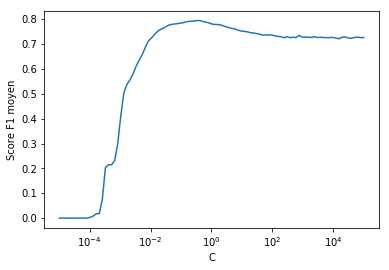

In [32]:
ax = plt.gca()

ax.plot(interval, mean_scores1)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [34]:
C_opt1 = interval[np.argmax(mean_scores1)]
clf1 = LinearSVC(C=C_opt1)
clf1.fit(X_train1,y_train1)
y_pred1=clf1.predict(X_test1)
f1_score(y_test1,y_pred1,pos_label=1)

0.76510903426791277

In [35]:
ind_neg1 = np.argsort(clf1.coef_).flatten()[0:10]
ind_pos1 = np.argsort(clf1.coef_).flatten()[clf1.coef_.shape[1]-10:]

In [37]:
np.array(vectorizer1.get_feature_names())[ind_neg1]

array(['macron', 'fillon', 'hamon', 'hamon2017', 'clairock', 'marin',
       'envi', 'francoisfillon', 'mlp', 'mlp_officiel'],
      dtype='<U39')

In [38]:
np.array(vectorizer1.get_feature_names())[ind_pos1]

array(['jlm_2017', 'penicheinsoumis', 'avenirencommun', 'révolutionfiscal',
       'jlmtoulous', 'insoumis', 'manson_fx', 'jlm2017', 'franceinsoumis',
       'jlmdesintox'],
      dtype='<U39')

In [110]:
clf1.predict(X_test1_2)

array([-1., -1., -1., -1., -1.,  1.])

## Macron against all

In [45]:
corpus2, labels2 = split_binary(8, candidate_to_tweets)
corpus2, ind2, unique_counts2= np.unique(corpus2, return_index=True, return_counts=True)
labels2 = labels2[ind2]

In [46]:
np.count_nonzero(labels2 == 1) / np.count_nonzero(labels2 == -1)

0.11222188357208168

In [47]:
[vectorizer2, X2] = build_vectorizer(corpus2,\
                                     stopwords=french_stopwords(),\
                                     b_stemming=True,\
                                     b_rmaccent=True,\
                                     b_lowercase=True,
                                    b_rmnumbers=True)

Removing numbers
Removing stopwords
Stemming
Removing uppercases
Removing accents


In [54]:
# pour vérifier à l'oeil nu
tweets_test2 = np.array(["Emmanuel #Macron l'escroquerie en marche", 
              "Au 2nd tour : #Fillon et #Mélenchon. L'électorat de droite fermera les yeux sur les affaires, celui de gauche ouvrira les siens sur #Macron.",
            "#JeVoteMacron 10 raisons de voter Macron ! #EnMarche #Macron2017 #Presidentielle2017",
            "Justement si #macron2017 a annoncé beaucoup de mesures pour les handicapés... #JeVoteMacron",
            "Ne vous trompez pas de bulletin de vote #JLM2017 pour la paix les autres c'est la guerre",
            "Je lis le programme de #Macron... Ça ratisse super large...Mais, ça se finance comment ?? #Marine2017"])

In [55]:
X_test2_2 = vectorize_docs(vectorizer2, tweets_test2)

In [56]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, labels2, test_size=0.3,random_state=0,stratify=labels2)

In [57]:
n_C = 100
interval = np.logspace(-5, 5, n_C)

mean_scores2 = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train2, y_train2, cv=4,scoring='f1')
    mean_scores2.append(np.mean(scores)) 

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/pyt

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to conver

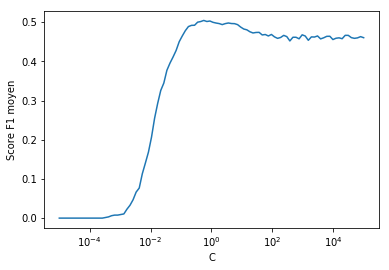

In [58]:
ax = plt.gca()

ax.plot(interval, mean_scores2)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [60]:
C_opt2 = interval[np.argmax(mean_scores2)]
clf2 = LinearSVC(C=C_opt2)
clf2.fit(X_train2,y_train2)
y_pred2=clf2.predict(X_test2)
f1_score(y_test2,y_pred2,pos_label=1)

0.52924256951102588

In [63]:
ind_neg2 = np.argsort(clf2.coef_).flatten()[0:10]
ind_pos2 = np.argsort(clf2.coef_).flatten()[clf2.coef_.shape[1]-10:]
print(list(np.array(vectorizer2.get_feature_names())[ind_neg2]))
print(list(np.array(vectorizer2.get_feature_names())[ind_pos2]))

['fillon', 'hamon', 'francoisfillon', 'jlm2017', 'aucoeurdudébat', 'marin', 'jevotefillon', 'pen', 'hamon2017', 'édito']
['consid', 'ridiculetv', 'impostur', 'incohérent', 'étouff', 'bariza_khiar', 'saougat', 'emmanuelholland', 'stopmacron', 'bisounour']


In [84]:
clf2.predict(X_test2_2)

array([ 1., -1., -1., -1., -1., -1.])

## Le Pen against all

In [64]:
corpus3, labels3 = split_binary(7, candidate_to_tweets)
corpus3, ind3, unique_counts3= np.unique(corpus3, return_index=True, return_counts=True)
labels3 = labels3[ind3]

In [65]:
np.count_nonzero(labels3 == 1) / np.count_nonzero(labels3 == -1)

0.05578058095127879

In [66]:
[vectorizer3, X3] = build_vectorizer(corpus3,\
                                     stopwords=french_stopwords(),\
                                     b_stemming=True,\
                                     b_rmaccent=True,\
                                     b_lowercase=True,
                                    b_rmnumbers=True)

Removing numbers
Removing stopwords
Stemming
Removing uppercases
Removing accents


In [111]:
# pour vérifier à l'oeil nu
tweets_test3 = np.array(["Emmanuel #Macron l'escroquerie en marche", 
              "Quand Marine rêve son Monde #Marine2017 ! il y a des rires glaçants, des coups sanglants et un peuple réduit à néant",
            "Sale pourris de journaleux @BFMTV ! Pro #islam pro #muz pro #Macron manipulation des sondages ! #ordure #Marine2017",
            "Arrêtons le massacre des artisans par les taxes, tous avec Marine @MLP_officiel #Marine2017",
            "Ne vous trompez pas de bulletin de vote #JLM2017 pour la paix les autres c'est la guerre",
            "Je lis le programme de #Macron... Ça ratisse super large...Mais, ça se finance comment ?? #Marine2017"])

In [112]:
X_test3_2 = vectorize_docs(vectorizer3, tweets_test3)

In [69]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, labels3, test_size=0.3,random_state=0,stratify=labels3)

In [70]:
n_C = 100
interval = np.logspace(-5, 5, n_C)

mean_scores3 = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train3, y_train3, cv=4,scoring='f1')
    mean_scores3.append(np.mean(scores)) 

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/pyt

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to conver

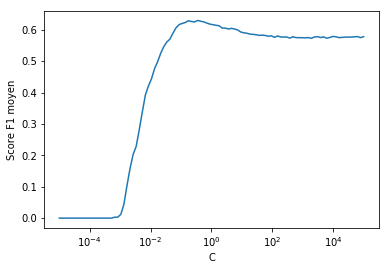

In [71]:
ax = plt.gca()

ax.plot(interval, mean_scores3)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [72]:
C_opt3= interval[np.argmax(mean_scores3)]
clf3 = LinearSVC(C=C_opt3)
clf3.fit(X_train3, y_train3)
y_pred3=clf3.predict(X_test3)
f1_score(y_test3,y_pred3,pos_label=1)

0.63073852295409172

In [73]:
ind_neg3 = np.argsort(clf3.coef_).flatten()[0:10]
ind_pos3 = np.argsort(clf3.coef_).flatten()[clf3.coef_.shape[1]-10:]
print(list(np.array(vectorizer3.get_feature_names())[ind_neg3]))
print(list(np.array(vectorizer3.get_feature_names())[ind_pos3]))

['fillon', 'jlm2017', 'lund', '20h00', 'francoisfillon', 'hamon2017', 'hamon', '15minutespourconvaincr', 'statur', 'défend']
['talon', 'f_desouch', 'amnezialien', 'mouhahah', 'sylvaincoigneau', 'truqu', 'perpignanmlp', 'marine2017', 'marineàpar', 'jechoisismarin']


In [113]:
clf3.predict(X_test3_2)

array([-1.,  1.,  1.,  1., -1., -1.])

## Fillon against all

In [75]:
corpus4, labels4 = split_binary(4, candidate_to_tweets)
corpus4, ind4, unique_counts4= np.unique(corpus4, return_index=True, return_counts=True)
labels4 = labels4[ind4]

np.count_nonzero(labels4 == 1) / np.count_nonzero(labels4 == -1)

0.08246321784527764

In [89]:
[vectorizer4, X4] = build_vectorizer(corpus4,\
                                     stopwords=french_stopwords(),\
                                     b_stemming=True,\
                                     b_rmaccent=True,\
                                     b_lowercase=True,
                                    b_rmnumbers=True)

Removing numbers
Removing stopwords
Stemming
Removing uppercases
Removing accents


In [114]:
# pour vérifier à l'oeil nu
tweets_test4 = np.array(["Emmanuel #Macron l'escroquerie en marche", 
              "Au 2nd tour : #Fillon et #Mélenchon. L'électorat de droite fermera les yeux sur les affaires, celui de gauche ouvrira les siens sur #Macron.",
            "« Ce que je veux, c’est que mon pays se redresse. » François Fillon #Fillon2017",
            "La #jeunesse : vous aurez un avenir avec @FrancoisFillon . #Fillon2017 #JeVoteFillon",
            "Ne vous trompez pas de bulletin de vote #JLM2017 pour la paix les autres c'est la guerre",
            "@FrancoisFillon La seule question qu’on doit vous poser c’est : QUAND EST CE QUE VOUS NE MENTEZ PAS ??!!"])

In [115]:
X_test4_2 = vectorize_docs(vectorizer4, tweets_test4)

In [79]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, labels4, test_size=0.3,random_state=0,stratify=labels4)

In [80]:
n_C = 100
interval = np.logspace(-5, 5, n_C)

mean_scores4 = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train4, y_train4, cv=4,scoring='f1')
    mean_scores4.append(np.mean(scores)) 

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/pyt

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to conver

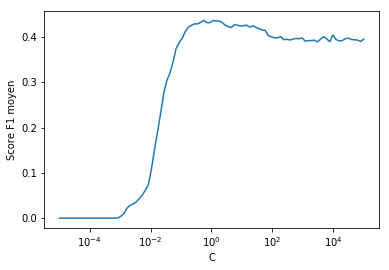

In [81]:
ax = plt.gca()

ax.plot(interval, mean_scores4)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [82]:
C_opt4= interval[np.argmax(mean_scores4)]
clf4 = LinearSVC(C=C_opt4)
clf4.fit(X_train4, y_train4)
y_pred4=clf4.predict(X_test4)
f1_score(y_test4,y_pred4,pos_label=1)

0.50264550264550267

In [83]:
ind_neg4 = np.argsort(clf4.coef_).flatten()[0:10]
ind_pos4 = np.argsort(clf4.coef_).flatten()[clf4.coef_.shape[1]-10:]
print(list(np.array(vectorizer4.get_feature_names())[ind_neg4]))
print(list(np.array(vectorizer4.get_feature_names())[ind_pos4]))

['montpelli', 'chais', 'domain', 'racaill', 'trois', 'islam', 'votent', 'gonfl', 'enmarch', 'singletau']
['chassent', 'posent', 'improvis', 'nifillonnilepen', 'corrigetonfillon', 'bobard', 'fillon', 'mrericm', 'balkany', 'ignobl']


In [116]:
clf4.predict(X_test4_2)

array([-1., -1., -1., -1., -1., -1.])

## Hamon against all

In [87]:
corpus5, labels5 = split_binary(5, candidate_to_tweets)
corpus5, ind5, unique_counts5= np.unique(corpus5, return_index=True, return_counts=True)
labels5 = labels5[ind5]

np.count_nonzero(labels5 == 1) / np.count_nonzero(labels5 == -1)

0.08259166963332147

In [90]:
[vectorizer5, X5] = build_vectorizer(corpus5,\
                                     stopwords=french_stopwords(),\
                                     b_stemming=True,\
                                     b_rmaccent=True,\
                                     b_lowercase=True,
                                    b_rmnumbers=True)

Removing numbers
Removing stopwords
Stemming
Removing uppercases
Removing accents


In [91]:
# pour vérifier à l'oeil nu
tweets_test5 = np.array(["Emmanuel #Macron l'escroquerie en marche", 
              "Au 2nd tour : #Fillon et #Mélenchon. L'électorat de droite fermera les yeux sur les affaires, celui de gauche ouvrira les siens sur #Macron.",
            "Pour la réussite scolaire des futurs générations, #Jevotepour #Hamon2017",
            "#JeVotePour #Hamon2017 #BenoitHamon2017 le candidat de la jeunesse",
            "Ne vous trompez pas de bulletin de vote #JLM2017 pour la paix les autres c'est la guerre",
            "#Hamon2017 Désigner un frondeur pour rassembler la gauche ? Une erreur de casting #macron2017 #Presidentielle2017"])

In [92]:
X_test5_2 = vectorize_docs(vectorizer5, tweets_test5)

In [93]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, labels5, test_size=0.3,random_state=0,stratify=labels5)

In [94]:
n_C = 100
interval = np.logspace(-5, 5, n_C)

mean_scores5 = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train5, y_train5, cv=5,scoring='f1')
    mean_scores5.append(np.mean(scores)) 

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lauranguyen/anaconda3/lib/pyt

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to conver

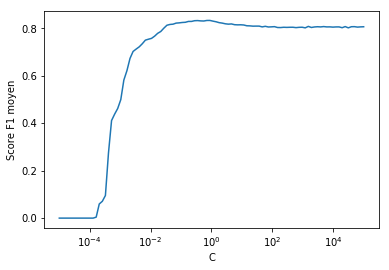

In [95]:
ax = plt.gca()

ax.plot(interval, mean_scores5)
ax.set_xscale('log')
plt.xlabel('C')
plt.ylabel('Score F1 moyen')
plt.axis('tight')
plt.show()

In [96]:
C_opt5= interval[np.argmax(mean_scores5)]
clf5 = LinearSVC(C=C_opt5)
clf5.fit(X_train5, y_train5)
y_pred5=clf5.predict(X_test5)
f1_score(y_test5,y_pred5,pos_label=1)

0.80098280098280106

In [97]:
ind_neg5 = np.argsort(clf5.coef_).flatten()[0:10]
ind_pos5 = np.argsort(clf5.coef_).flatten()[clf5.coef_.shape[1]-10:]
print(list(np.array(vectorizer5.get_feature_names())[ind_neg5]))
print(list(np.array(vectorizer5.get_feature_names())[ind_pos5]))

['protecteur', 'pétit', 'reconnaiss', 'fillon', 'cherk', 'ced', 'casserol', 'cliqu', 'particuli', 'fill']
['mistertielib', 'marg', 'modif', 'hamon', 'realdonaldtrump', 'neutre_on', 'nancyavechamon', 'paysdelaloir', 'benoithamon', 'hamon2017']


In [98]:
clf5.predict(X_test5_2)

array([-1., -1.,  1.,  1., -1.,  1.])